In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime 

In [3]:
#defino path
path=r'/Users/claudia/Documents/CoastSat-master/Adecuar marea'
#abro doc de marea del SHN
df=pd.read_csv(path+r'/Marea-MdP-SHN.csv',header=None,names=['year','month','day','hour','tide'])
df.head()

,year,month,day,hour,tide
0,NaN,tide,NaN,NaN,NaN
1,1986-01-04 00:00:00+00:00,0.741,NaN,NaN,NaN
2,1986-01-04 01:00:00+00:00,0.681,NaN,NaN,NaN
3,1986-01-04 02:00:00+00:00,0.501,NaN,NaN,NaN
4,1986-01-04 03:00:00+00:00,0.251,NaN,NaN,NaN


In [4]:
a = pd.to_datetime(df[["year", "month", "day", "hour"]])
a=datetime.datetime.isoformat(pd.to_datetime(df[["year", "month", "day", "hour"]]))
#b=datetime.datetime.replace(a,tzinfo=datetime.timezone.utc).isoformat()

print(type(a))

#Con esto de a abajo me hago lo que necesito solo que el tiempo no lo reconoce el programa porque
#tengo que llevalo a las fechas del satelite que es formato datetime, formato ISO, uso horario UTC=0 (GMT) = datos satelitales

TypeError: descriptor 'isoformat' requires a 'datetime.datetime' object but received a 'Series'

In [5]:

#Saco media para llevar los niveles a 0 (tienen una referencia en la base del mareografo
msl=np.mean(df.tide)
t=df.tide-msl
#paso de cm a m y redondeo a 3 decimales
t=(t/100).round(3)
#convierto t en dataframe y le pongo la variable dates de indice
t=pd.DataFrame(t)
t=t.set_index(a)
t.to_csv('MareaFinal-MdP-SHN.csv')
t.head()

,tide
1986-01-04 13:00:00,0.741
1986-01-04 14:00:00,0.681
1986-01-04 15:00:00,0.501
1986-01-04 16:00:00,0.251
1986-01-04 17:00:00,-0.009


/Users/claudia/opt/anaconda3/envs/coastsat/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


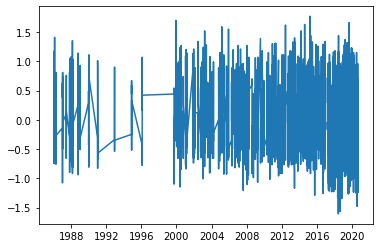

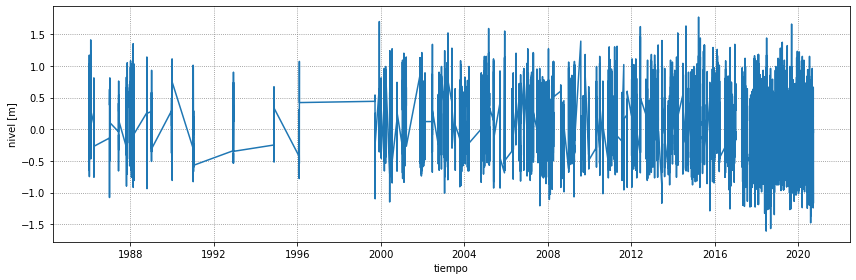

In [6]:
plt.plot(t)
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(t)
ax.set(xlabel="tiempo", ylabel="nivel [m]")
ax.grid(color='grey',linestyle=':')
plt.tight_layout()
#save figure
#plt.savefig(path+r'\figura_niveles.png',dpi=300)